In [117]:
#Is there a premium

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [155]:
car_sales_data = pd.read_csv('./Online_Cars_Sale_Marketplace_Data.csv')

In [156]:
car_sale_data

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,26944,4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28568,4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [157]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [158]:
# Load the database into a pandas dataframe
car_sale_data = pd.read_csv('./Online_Cars_Sale_Marketplace_Data.csv')

# Remove the dollar sign from the 'Price' column
car_sale_data['Price'] = car_sale_data['Price'].str.replace('$', '')

# Remove the comma from the 'Price' column
car_sale_data['Price'] = car_sale_data['Price'].str.replace(',', '')

# Remove the "Not Priced" from the 'Price' column
car_sale_data = car_sale_data[car_sale_data['Price']!= 'Not Priced']

# Turn 'Price' into all ints
car_sale_data['Price'] = car_sale_data['Price'].astype(int)


car_sale_data

/var/folders/s0/6td_1_5n7m94_g09f8k7mnz00000gn/T/ipykernel_8550/3243639420.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_sale_data['Price'] = car_sale_data['Price'].str.replace('$', '')


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,26944,4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28568,4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [159]:
car_sale_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9374 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9374 non-null   int64  
 1   Make                   9374 non-null   object 
 2   Model                  9374 non-null   object 
 3   Used/New               9374 non-null   object 
 4   Price                  9374 non-null   int64  
 5   ConsumerRating         9374 non-null   float64
 6   ConsumerReviews        9374 non-null   int64  
 7   SellerType             9374 non-null   object 
 8   SellerName             9374 non-null   object 
 9   SellerRating           9374 non-null   float64
 10  SellerReviews          9374 non-null   int64  
 11  StreetName             9374 non-null   object 
 12  State                  9374 non-null   object 
 13  Zipcode                9374 non-null   object 
 14  DealType               9152 non-null   object 
 15  Comf

/Users/vickiel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


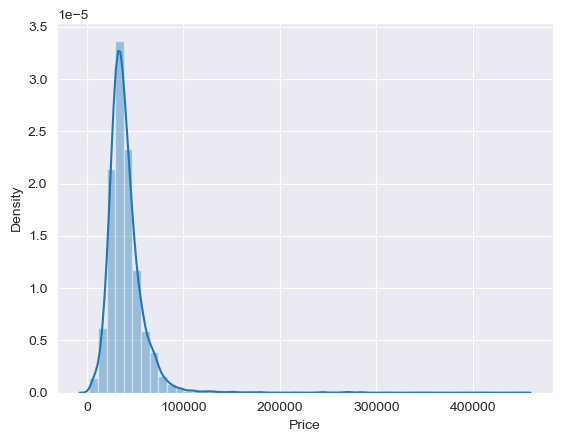

In [160]:
sns.set_style('darkgrid')
sns.distplot(a=car_sale_data['Price']);

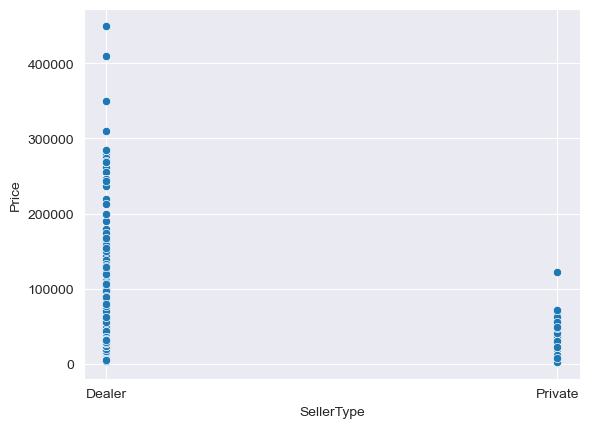

In [161]:
sns.scatterplot(x=car_sale_data['SellerType'], y=car_sale_data['Price']);

In [162]:
car_sale_data.sort_values(by=["Price"])[["Price"]]

,Price
2593,2300
6060,3995
811,3995
424,3999
1048,4250
...,...
7022,285000
2181,309888
1626,349995
2888,409999


In [202]:
countDealer = len(car_sale_data[car_sale_data['SellerType'] == 'Dealer'])
print("The number of Dealers are:",countDealer)

The number of Dealers are: 9334


In [203]:
countPrivate = len(car_sale_data[car_sale_data['SellerType'] == 'Private'])
print("The number of Dealers are:",countPrivate)

The number of Dealers are: 40
